<a href="https://colab.research.google.com/github/lydiahiba/exploradome_tangram/blob/cnn---team-2/projet_exploradome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import math
import datetime
from fastai.vision import *
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

## Connect in google drive

In [ ]:
# Google drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Unzip file

In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'Colab Notebooks'   model1   model2	     weight_model2
 Exploradome	    Model1   weight_model1


In [ ]:
# creata directory videos
os.makedirs("data", exist_ok=True)
!mv data /content

In [ ]:
!ls content

gdrive	sample_data


In [ ]:
!unzip "/content/gdrive/My Drive/Exploradome/ext.zip" -d "/content/"

In [ ]:
!ls content

ext  gdrive  sample_data


## Create labels

In [ ]:
# create labels and path
PATH = ("/content/data")
Labels = ['bateau', 'bol', 'chat', 'coeur', 'cygne', 'lapin', 'maison', 'marteau', 'montagne', 'pont', 'renard','tortue']

/content/data/bateau/Bateau_right_6.jpg


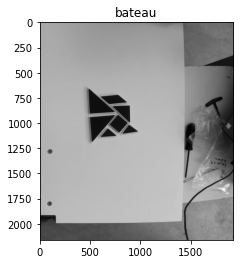

In [ ]:
# Show img
for label in Labels:
    path = os.path.join(PATH, label)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        print(os.path.join(path, img))
        plt.imshow(img_array, cmap="gray")
        plt.title(Labels[os.listdir(path).index(img)])
        plt.show()
        break
    break

## Create data

In [ ]:
IMG_SIZE = tuple((250, 250))
data_images = []
data = []
targets = []
def creat_train_data():
    for label in Labels:
        path = os.path.join(PATH, label)  
        index_ = Labels.index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, IMG_SIZE, interpolation=cv2.INTER_AREA)
                imgGray = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
                imgGray_flat=np.array(imgGray).flatten()
                data_images.append(imgGray)
                targets.append(index_)
                data.append(imgGray_flat)
            except Exception as e:
                print(e)

creat_train_data()

In [ ]:
print(len(data_images))
print(len(data))
print(len(targets))

266
266
266


In [ ]:
data_images = np.array(data_images)
data = np.array(data)
targets = np.array(targets)

In [ ]:
print(data_images.shape)
print(data.shape)
print(targets.shape)

(266, 250, 250)
(266, 62500)
(266,)


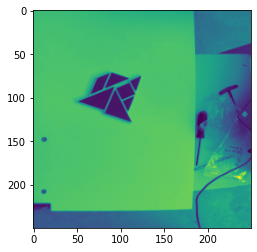

In [ ]:
plt.imshow(data_images[3])

## Preprocessing

In [ ]:
# facilité les calcules
def preprocess_image(img):
    return img / 255.0

In [ ]:
# avant 
data[1]

array([40, 39, 37, 41, ..., 97, 94, 90, 89], dtype=uint8)

In [ ]:
# data
dataset = []
for i in range(len(data)):
    dataset.append(preprocess_image(data[i]))

In [ ]:
# Apres 
dataset[1]

array([0.156863, 0.152941, 0.145098, 0.160784, ..., 0.380392, 0.368627, 0.352941, 0.34902 ])

In [ ]:
dataset = np.array(dataset)

In [ ]:
# images
images = []
for i in range(len(data_images)):
    images.append(preprocess_image(data_images[i]))

In [ ]:
images = np.array(images)

In [ ]:
images[1]

array([[0.156863, 0.152941, 0.145098, 0.160784, ..., 0.662745, 0.662745, 0.666667, 0.666667],
       [0.164706, 0.164706, 0.160784, 0.156863, ..., 0.666667, 0.666667, 0.666667, 0.666667],
       [0.156863, 0.164706, 0.160784, 0.156863, ..., 0.666667, 0.666667, 0.666667, 0.670588],
       [0.156863, 0.164706, 0.152941, 0.156863, ..., 0.662745, 0.666667, 0.666667, 0.670588],
       ...,
       [0.219608, 0.231373, 0.227451, 0.231373, ..., 0.403922, 0.396078, 0.388235, 0.372549],
       [0.219608, 0.235294, 0.231373, 0.223529, ..., 0.380392, 0.380392, 0.380392, 0.364706],
       [0.227451, 0.235294, 0.227451, 0.223529, ..., 0.380392, 0.364706, 0.356863, 0.352941],
       [0.227451, 0.227451, 0.223529, 0.227451, ..., 0.380392, 0.368627, 0.352941, 0.34902 ]])

## Split data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split data 
def split(X, y):
  xtr, xtes, ytr, ytes = train_test_split(X, y, test_size=0.33)
  print(f'shape of train: {xtr.shape} \n shape of test: {xtes.shape} \n shape of target train: {ytr.shape} \n shape of target test: {ytes.shape}')
  return xtr, xtes, ytr, ytes

In [ ]:
  # split dataset 
  Xtrain, Xtest, Ytrain, Ytest =  split(dataset, targets) 

shape of train: (178, 62500) 
 shape of test: (88, 62500) 
 shape of target train: (178,) 
 shape of target test: (88,)


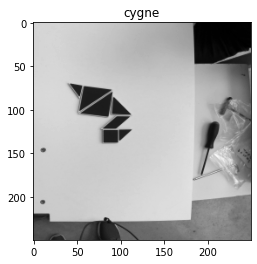

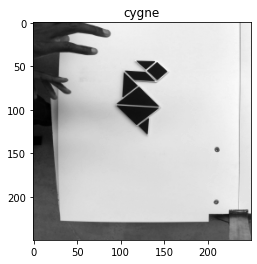

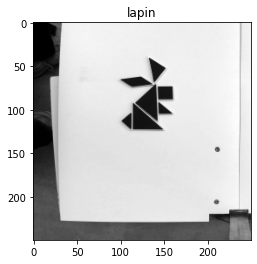

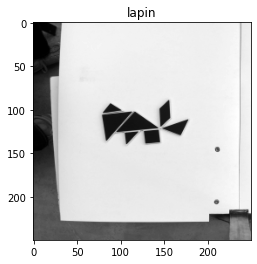

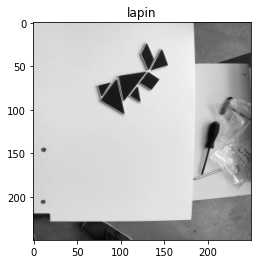

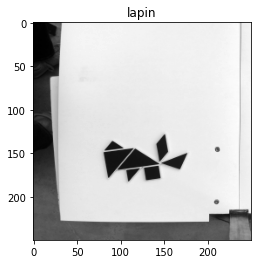

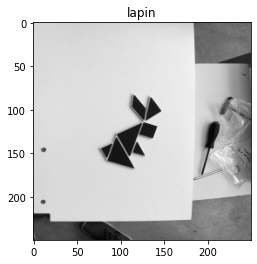

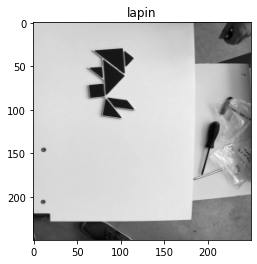

In [ ]:
# Plot some image in data
for i in range(len(dataset[100:108])):
  plt.imshow(dataset[102+i].reshape(250, 250), cmap="gray")
  plt.title(Labels[targets[102+i]])
  plt.show()



## create models 1

In [ ]:
# create input 
Labels = np.array(Labels)
Labels.shape

(12,)

In [ ]:
# determine the shape of the input images
in_shape_ = Xtrain.shape[1:]

In [ ]:
# determine the number of classes
n_classes1 = len(np.unique(Ytrain))
print(in_shape_, n_classes1)

(62500,) 12


In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
# Add the layers
model.add(tf.keras.layers.Dense(1536, activation="relu", input_shape=dataset.shape[1:]))
tf.keras.layers.Dropout(0.1),
model.add(tf.keras.layers.Dense(units=n_classes1, activation="softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
opt_ = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9)

In [ ]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer= opt_,
    metrics=["accuracy"]
)

In [ ]:
# fit model
history = model.fit(Xtrain, Ytrain, epochs=80,  batch_size=30, verbose=2, validation_data=(Xtest, Ytest))

Epoch 1/80
6/6 - 0s - loss: 2.5958 - accuracy: 0.1067 - val_loss: 2.6755 - val_accuracy: 0.0682
Epoch 2/80
6/6 - 0s - loss: 2.5455 - accuracy: 0.1404 - val_loss: 2.5803 - val_accuracy: 0.1250
Epoch 3/80
6/6 - 0s - loss: 2.4060 - accuracy: 0.1910 - val_loss: 2.4236 - val_accuracy: 0.1705
Epoch 4/80
6/6 - 0s - loss: 2.3338 - accuracy: 0.2697 - val_loss: 2.4738 - val_accuracy: 0.1477
Epoch 5/80
6/6 - 0s - loss: 2.2367 - accuracy: 0.2472 - val_loss: 2.4241 - val_accuracy: 0.1932
Epoch 6/80
6/6 - 0s - loss: 2.1589 - accuracy: 0.3146 - val_loss: 2.3173 - val_accuracy: 0.2500
Epoch 7/80
6/6 - 0s - loss: 2.1461 - accuracy: 0.2865 - val_loss: 2.2595 - val_accuracy: 0.2159
Epoch 8/80
6/6 - 0s - loss: 2.1261 - accuracy: 0.3258 - val_loss: 2.2546 - val_accuracy: 0.2045
Epoch 9/80
6/6 - 0s - loss: 2.0671 - accuracy: 0.3315 - val_loss: 2.1479 - val_accuracy: 0.3409
Epoch 10/80
6/6 - 0s - loss: 2.0559 - accuracy: 0.4157 - val_loss: 2.2363 - val_accuracy: 0.2273
Epoch 11/80
6/6 - 0s - loss: 1.9639 - a

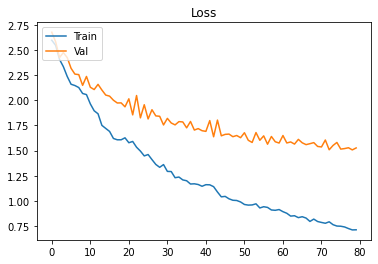

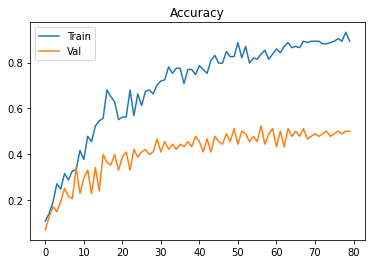

In [ ]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

## Evalution

In [ ]:
loss, acc = model.evaluate(Xtest, Ytest)
print("Test Loss", loss)
print("Test Accuracy", acc)

3/3 [==============================] - 0s 5ms/step - loss: 1.5262 - accuracy: 0.5000
Test Loss 1.5262107849121094
Test Accuracy 0.5


## Prediction

In [ ]:
# predict
model_output = model.predict(Xtest[0:1])
print(model_output, 'True:', Labels[targets[0:1]], 'predict:', Labels[np.argmax(model_output)])
print(Labels)

[[9.680596e-05 4.409919e-01 3.382142e-02 2.383588e-01 7.274441e-04 2.402725e-02 1.892385e-03 1.838536e-02 7.125738e-03
  2.174109e-03 2.310641e-01 1.334821e-03]] True: ['bateau'] predict: bol
['bateau' 'bol' 'chat' 'coeur' 'cygne' 'lapin' 'maison' 'marteau' 'montagne' 'pont' 'renard' 'tortue']


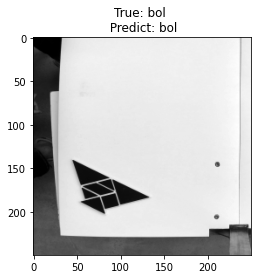

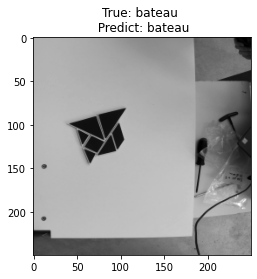

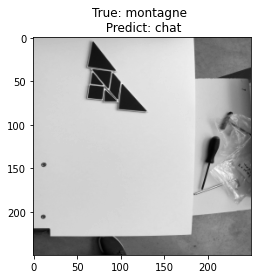

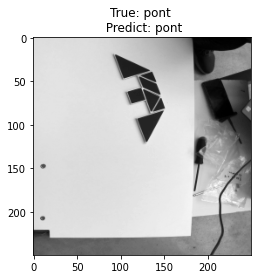

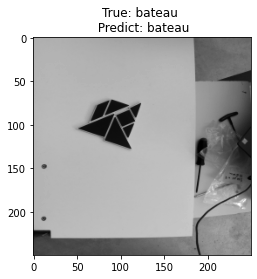

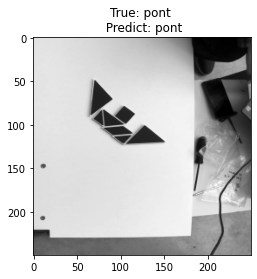

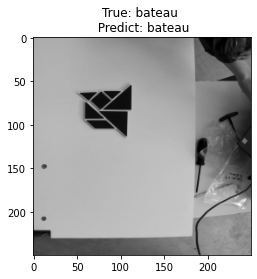

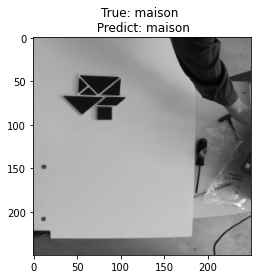

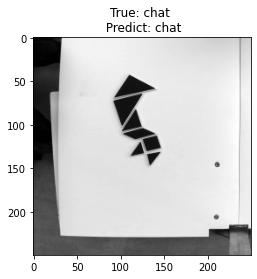

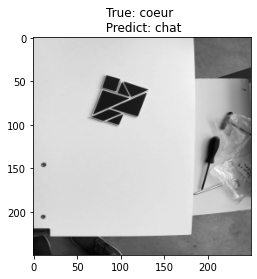

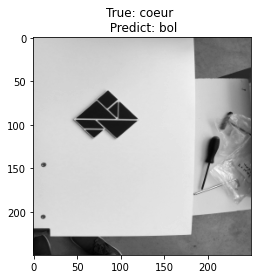

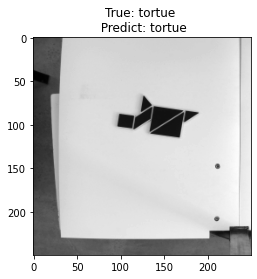

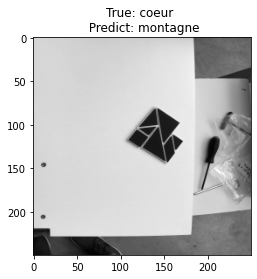

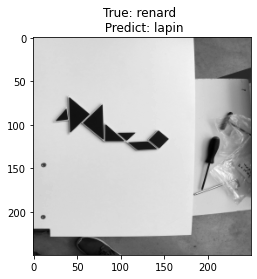

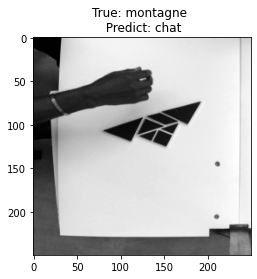

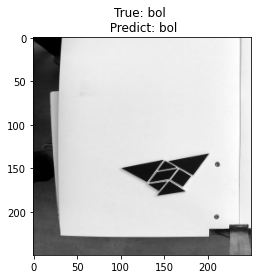

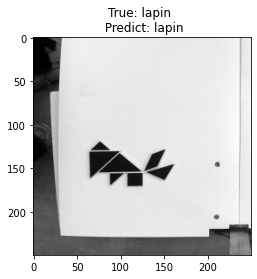

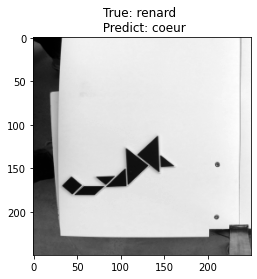

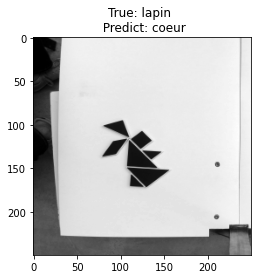

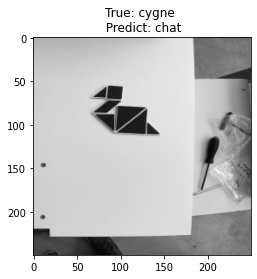

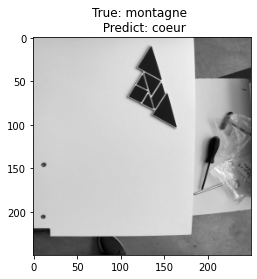

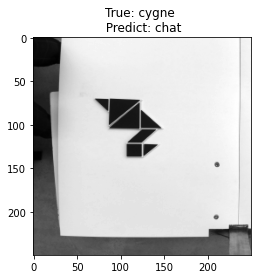

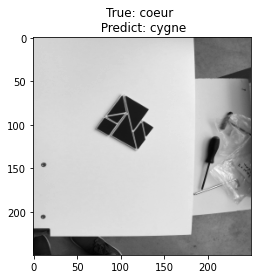

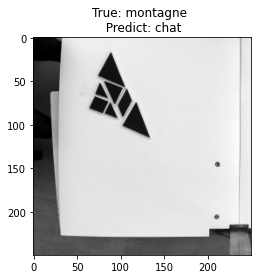

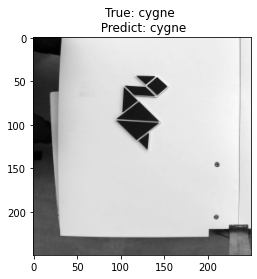

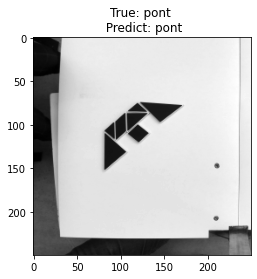

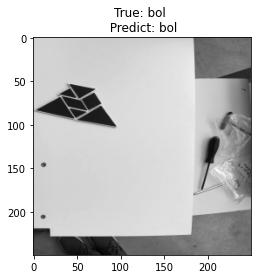

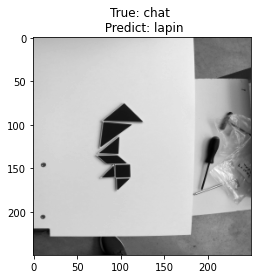

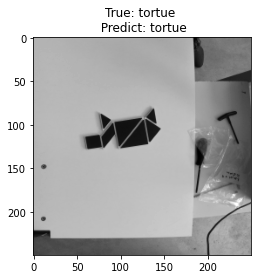

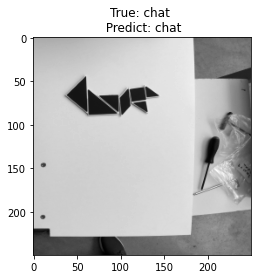

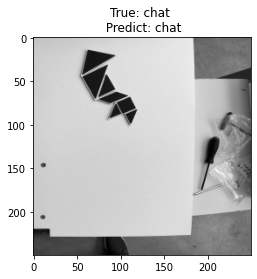

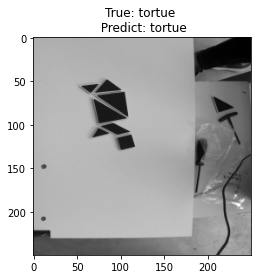

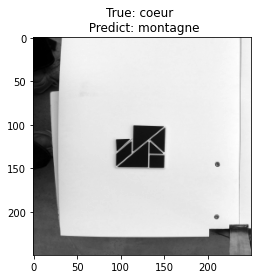

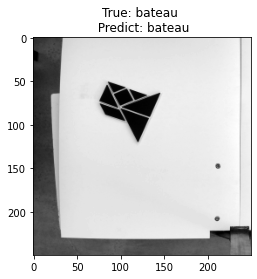

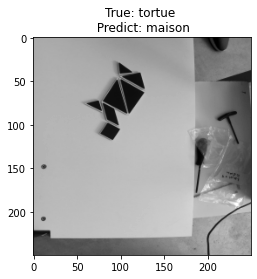

In [ ]:
imgs = Xtest[0:35]
# teste prediction with img test
def prediction(model, imgs):
  for i in range(len(imgs)):
    model_output = model.predict(imgs[i:i+1])
    plt.imshow(imgs[i:i+1].reshape(250, 250), cmap="gray")
    plt.title(f'True: {Labels[Ytest[i]]} \n Predict: {Labels[np.argmax(model_output)]}')
    plt.show()

prediction(model,imgs)

In [ ]:
Y_pred = model.predict_generator(Xtest)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(tf.math.confusion_matrix(Ytest, y_pred))

Instructions for updating:
Please use Model.predict, which supports generators.
Confusion Matrix
tf.Tensor(
[[5 0 0 0 ... 0 0 0 0]
 [0 1 0 0 ... 0 0 0 0]
 [0 0 1 0 ... 0 1 1 0]
 [1 2 0 1 ... 4 0 1 0]
 ...
 [0 1 3 1 ... 0 0 0 0]
 [0 0 0 0 ... 0 6 0 0]
 [0 1 0 0 ... 1 0 5 0]
 [0 0 0 0 ... 0 0 0 7]], shape=(12, 12), dtype=int32)


## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
cm = confusion_matrix(y_true=Ytest, y_pred=y_pred)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(9,9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = Labels

Confusion matrix, without normalization
[[ 9  0  0  0 ...  0  0  0  0]
 [ 0  4  0  1 ...  0  0  1  0]
 [ 0  0  5  0 ...  0  0  1  0]
 [ 0  2  2  1 ...  2  0  1  0]
 ...
 [ 0  1  3  0 ...  2  0  5  0]
 [ 0  0  0  0 ...  1 11  0  0]
 [ 0  0  0  1 ...  0  0  1  0]
 [ 0  0  0  0 ...  0  0  0  9]]


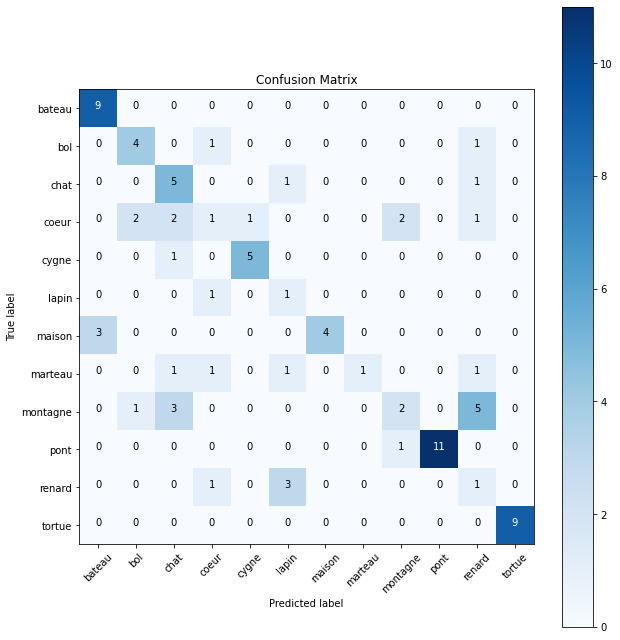

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
# import matplotlib.pyplot as plt
# from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D
# from tensorflow.keras.models import Model

## Model 2

In [ ]:
  # split images 
  img_train, img_test, target_train, target_test =  split(images, targets) 

shape of train: (178, 250, 250) 
 shape of test: (88, 250, 250) 
 shape of target train: (178,) 
 shape of target test: (88,)


In [ ]:
img_train[3].shape

(250, 250)

Text(0.5, 1.0, 'tortue')

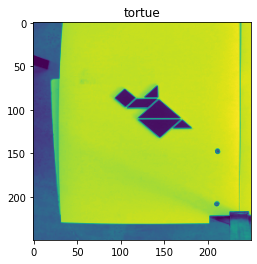

In [ ]:
plt.imshow(img_train[3])
plt.title(Labels[target_train[3]])

In [ ]:
# reshape data to have a single channel
img_train = img_train.reshape((img_train.shape[0], img_train.shape[1], img_train.shape[2], 1))
img_test = img_test.reshape((img_test.shape[0], img_test.shape[1], img_test.shape[2], 1))

In [ ]:
print(img_train.shape)
print(img_test.shape)

(178, 250, 250, 1)
(88, 250, 250, 1)


In [ ]:
# determine the shape of the input images
in_shape = img_train.shape[1:]

In [ ]:
# determine the number of classes
n_classes = len(np.unique(target_train))
print(in_shape, n_classes)

(250, 250, 1) 12


In [ ]:
layers1 = [ 
    tf.keras.layers.Conv2D(filters=16, kernel_size=(2,2), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform', input_shape=img_train.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), padding="Same"),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), padding="Same"),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), padding="Same"),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(2,2), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), padding="Same"),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(2,2), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), padding="Same"),
    
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=n_classes, activation=tf.nn.softmax)
]

In [ ]:
layers2 = [ 
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform', input_shape=img_train.shape[1:]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu, strides=(1,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.nn.relu, strides=(1,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3),activation=tf.nn.relu, strides=(1,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation=tf.nn.relu, strides=(1,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation=tf.nn.relu, strides=(1,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=n_classes, activation=tf.nn.softmax)
]

In [ ]:
layers = [ 
    tf.keras.layers.Conv2D(filters=16, kernel_size=(2,2), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform', input_shape=img_train.shape[1:]),    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), padding="Same"),
 
    tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), padding="Same"),
 
    tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), padding="Same"),
 
    tf.keras.layers.Conv2D(filters=128, kernel_size=(2,2), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), padding="Same"),
 
    tf.keras.layers.Conv2D(filters=256, kernel_size=(2,2), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), padding="Same"),
 
    tf.keras.layers.Dropout(0.3),
 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=n_classes, activation=tf.nn.softmax)

SyntaxError: ignored

In [ ]:
model_2 = tf.keras.Sequential(layers2)

In [ ]:
opt1 = tf.keras.optimizers.Adam(learning_rate=0.01)
opt_1 = tf.keras.optimizers.SGD(lr=0.0008, momentum=0.5)

In [ ]:
model_2.compile(optimizer = opt1,
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.metrics.SparseCategoricalAccuracy()])

In [ ]:
history_2 = model_2.fit(img_train, target_train, epochs=25, batch_size=15, verbose=2, validation_data=(img_test, target_test))
history_2

Epoch 1/25
12/12 - 1s - loss: 147462.4844 - sparse_categorical_accuracy: 0.0618 - val_loss: 174.5920 - val_sparse_categorical_accuracy: 0.0909
Epoch 2/25
12/12 - 1s - loss: 31.5409 - sparse_categorical_accuracy: 0.1011 - val_loss: 2.5320 - val_sparse_categorical_accuracy: 0.0568
Epoch 3/25
12/12 - 1s - loss: 3.1777 - sparse_categorical_accuracy: 0.0674 - val_loss: 2.4878 - val_sparse_categorical_accuracy: 0.0682
Epoch 4/25
12/12 - 1s - loss: 2.4883 - sparse_categorical_accuracy: 0.0674 - val_loss: 2.4894 - val_sparse_categorical_accuracy: 0.0795
Epoch 5/25
12/12 - 1s - loss: 2.4834 - sparse_categorical_accuracy: 0.0899 - val_loss: 2.4956 - val_sparse_categorical_accuracy: 0.0568
Epoch 6/25
12/12 - 1s - loss: 2.4792 - sparse_categorical_accuracy: 0.0899 - val_loss: 2.5013 - val_sparse_categorical_accuracy: 0.0682
Epoch 7/25
12/12 - 1s - loss: 2.4766 - sparse_categorical_accuracy: 0.1011 - val_loss: 2.5072 - val_sparse_categorical_accuracy: 0.0682
Epoch 8/25
12/12 - 1s - loss: 2.4741 - s

KeyboardInterrupt: ignored

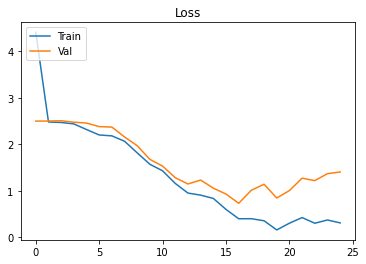

In [ ]:
loss_curve = history_2.history["loss"]

loss_val_curve = history_2.history["val_loss"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()


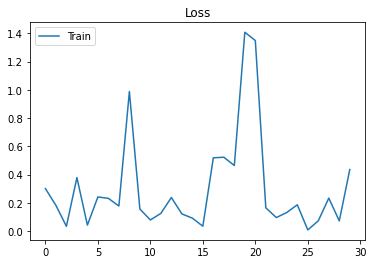

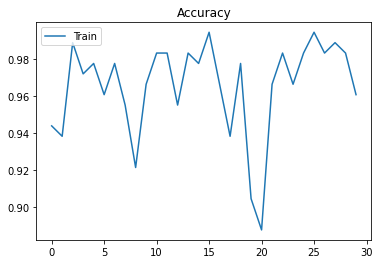

In [ ]:

loss_curve = history_2.history["loss"]
acc_curve = history_2.history["sparse_categorical_accuracy"]

#loss_val_curve = history.history["val_loss"]
#acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
#plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
#plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [ ]:
# imgs = img_test[0:10]
# # teste prediction with img test
# def prediction(model, imgs):
#   for i in range(len(imgs)):
#     model_output = model.predict(imgs[i:i+1])
#     plt.imshow(imgs[i:i+1].reshape(250, 250), cmap="gray")
#     plt.show()
# 
# prediction(model_2,imgs)

## Evaluation

In [ ]:
loss, acc = model_2.evaluate(img_test, target_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

3/3 [==============================] - 0s 9ms/step - loss: 2.1819 - sparse_categorical_accuracy: 0.5909
Test Loss 2.1818552017211914
Test Accuracy 0.5909090638160706


## Predict

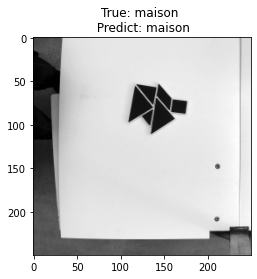

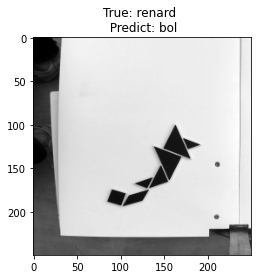

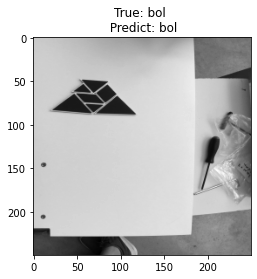

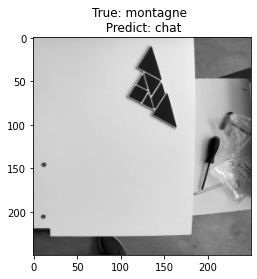

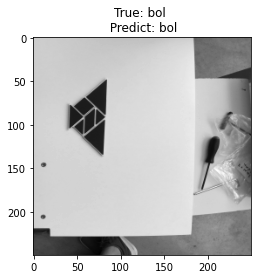

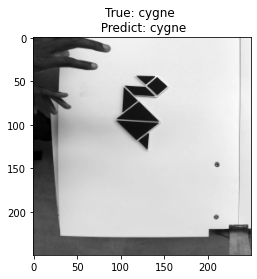

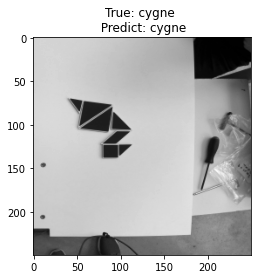

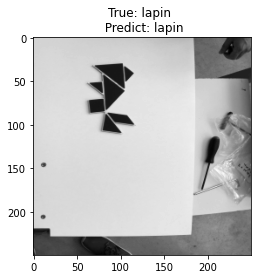

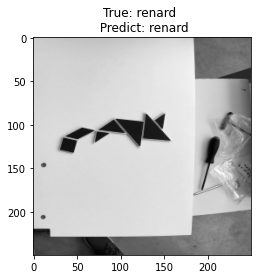

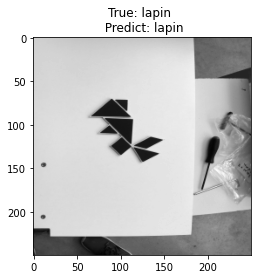

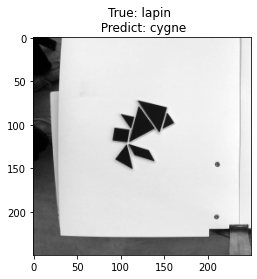

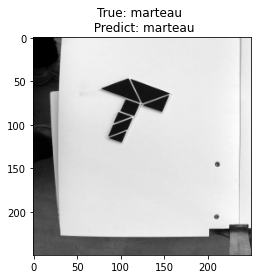

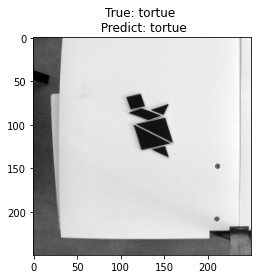

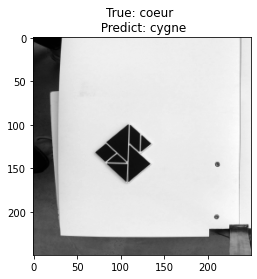

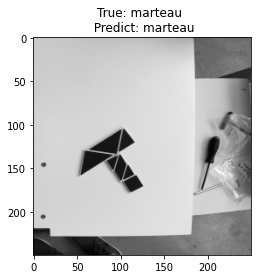

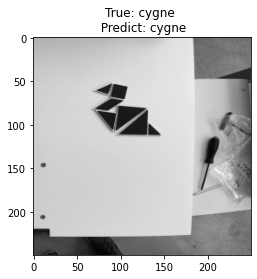

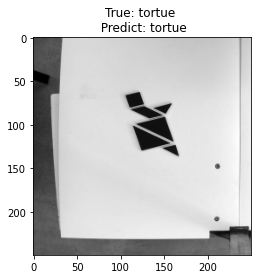

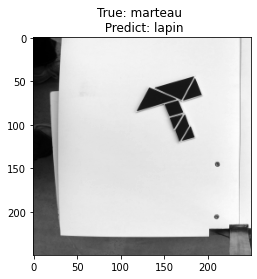

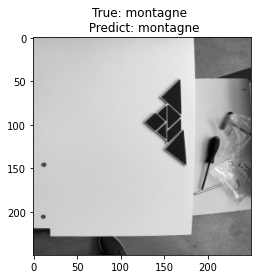

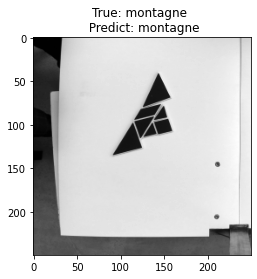

In [ ]:
# teste prediction with img test
imgs = img_test[0:20]
def prediction(model, imgs):
  for i in range(len(imgs)):
    model_output = model.predict(imgs[i:i+1])
    plt.imshow(imgs[i].reshape(250, 250), cmap="gray")
    plt.title(f'True: {Labels[target_test[i]]} \n Predict: {Labels[np.argmax(model_output)]}')
    plt.show()

prediction(model_2,imgs)

## Confusion matrix

In [ ]:
Y_pred_2 = model_2.predict_generator(img_test)
y_pred_2 = np.argmax(Y_pred_2, axis=1)
print('Confusion Matrix')
print(tf.math.confusion_matrix(target_test, y_pred_2))

Confusion Matrix
tf.Tensor(
[[5 0 0 0 ... 0 0 0 0]
 [0 7 0 0 ... 0 0 0 0]
 [0 0 5 0 ... 0 0 0 0]
 [0 0 0 2 ... 0 0 0 0]
 ...
 [0 0 4 0 ... 3 0 1 0]
 [0 0 0 0 ... 0 5 0 0]
 [0 2 0 0 ... 0 0 5 0]
 [0 0 0 0 ... 0 0 0 9]], shape=(12, 12), dtype=int32)


Confusion matrix, without normalization
[[5 0 0 0 ... 0 0 0 0]
 [0 7 0 0 ... 0 0 0 0]
 [0 0 5 0 ... 0 0 0 0]
 [0 0 0 2 ... 0 0 0 0]
 ...
 [0 0 4 0 ... 3 0 1 0]
 [0 0 0 0 ... 0 5 0 0]
 [0 2 0 0 ... 0 0 5 0]
 [0 0 0 0 ... 0 0 0 9]]


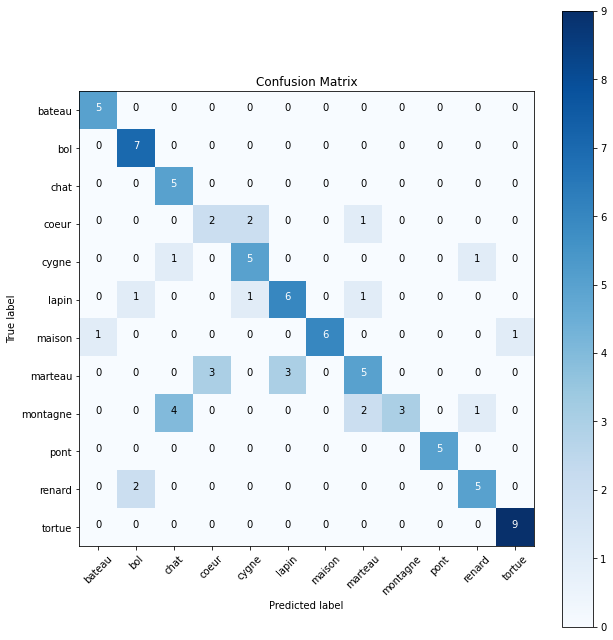

In [ ]:
cm_2 = confusion_matrix(y_true=target_test, y_pred=y_pred_2)
cm_plot_labels = Labels
plot_confusion_matrix(cm=cm_2, classes=cm_plot_labels, title='Confusion Matrix')

## Save model 1

In [ ]:
!ls /mydrive

'Colab Notebooks'   model1   weight_model1
 Exploradome	    model2   weight_model2


In [ ]:
# je save les poids
# Save the weights
model.save('/mydrive/Model1') 
model.save_weights('/mydrive/weight_model1/poids_model_1')

INFO:tensorflow:Assets written to: /mydrive/Model1/assets


## Save model 2

In [ ]:
# Save the weights
model_2.save('/mydrive/model2') 
model_2.save_weights('/mydrive/weight_model2/poids_model_2')

INFO:tensorflow:Assets written to: /mydrive/model2/assets


## Check its architecture

In [ ]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 1712)              107001712 
_________________________________________________________________
dense_112 (Dense)            (None, 12)                20556     
Total params: 107,022,268
Trainable params: 107,022,268
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 250, 250, 16)      80        
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 125, 125, 32)      2080      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 42, 42, 64)        8256      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 128)     